In [3]:
"""
Boulder County historical ignitions
"""

import os
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

maindir = '/Users/max/Library/CloudStorage/OneDrive-Personal/mcook/'
projdir = os.path.join(maindir, 'aspen-fire/')

print("Ready !")

Ready !


In [4]:
# load the fpa-fod ignitions data and get the total count
fpa_fp = os.path.join(projdir,'Aim3/data/spatial/mod/fire/srm_fpa_fod.gpkg')
fpa = gpd.read_file(fpa_fp)
fpa.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

In [5]:
print(fpa['FIRE_YEAR'].min())
print(fpa['FIRE_YEAR'].max())

1992
2020


In [6]:
fpa['FIRE_SIZE_CLASS'].unique()

array(['A', 'B', 'C', 'D', 'F', 'E', 'G'], dtype=object)

NameError: name 'Line2D' is not defined

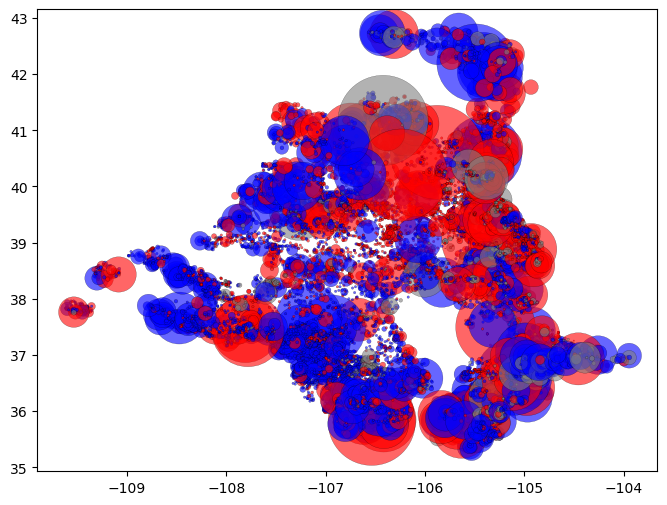

In [7]:
# Make a spatial map of the ignitions
fpa['NWCG_CAUSE_CLASSIFICATION'] = fpa['NWCG_CAUSE_CLASSIFICATION'].replace(
    'Missing data/not specified/undetermined', 'Unknown'
)

color_mapping = {
    'Human': 'red',
    'Natural': 'blue',
    'Unknown': 'gray'
}

fpa['color'] = fpa['NWCG_CAUSE_CLASSIFICATION'].map(color_mapping)

fpa = fpa.to_crs('EPSG:4326')
# boco = boco.to_crs('EPSG:4326')

# create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the county boundary
# boco.plot(ax=ax, edgecolor='black', linewidth=1.8, color='none')

# Plot ignitions with size based on FIRE_SIZE and color by cause
scatter = ax.scatter(
    fpa.geometry.x, 
    fpa.geometry.y, 
    c=fpa['color'], 
    s=np.sqrt(fpa['FIRE_SIZE']) * 10,  # Scale for better visibility
    alpha=0.6, 
    edgecolor='k', 
    linewidth=0.2
)

# Create a legend for ignition cause
legend_elements = []
# Add ignition causes first
for cause, color in color_mapping.items():
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=cause)
    )
# Add roads last
legend_elements.append(Line2D([0], [0], color='gray', linewidth=1.2, label='Major Roads'))

# Add the combined legend
ax.legend(handles=legend_elements, loc='upper left', frameon=True, fontsize=10)

ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.tight_layout()

# Save the map as a PNG
# plt.savefig(os.path.join(projdir, 'figures/BoulderCounty_Ignitions_FPA-FOD.png'), dpi=300, bbox_inches='tight')

plt.show()

NWCG_CAUSE_CLASSIFICATION  Human  Natural  Unknown
FIRE_YEAR                                         
1992                        39.0     12.0     64.0
1993                        46.0     14.0     45.0
1994                        22.0     25.0     45.0
Human
Natural
Unknown


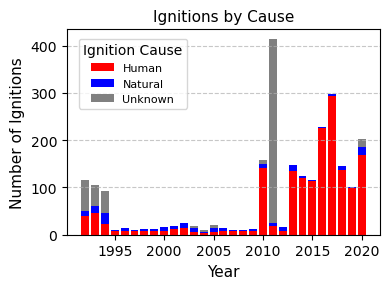

In [111]:
# tidy the dataframe for plotting
ignition_counts = boco_ig.groupby(['FIRE_YEAR', 'NWCG_CAUSE_CLASSIFICATION']).size().reset_index(name='count')
ignition_counts = ignition_counts.pivot(index='FIRE_YEAR', columns='NWCG_CAUSE_CLASSIFICATION', values='count').fillna(0)
print(ignition_counts.head(3))

# Plot the time-series
# Initialize the plot
fig, ax = plt.subplots(figsize=(4, 3))

# Initialize bottom for stacking
bottom = np.zeros(len(ignition_counts))

# Iterate through each cause and plot its bar
for cause in ignition_counts.columns:
    print(cause)
    ax.bar(
        ignition_counts.index, 
        ignition_counts[cause], 
        bottom=bottom, 
        label=cause, 
        color=color_mapping.get(cause, 'blue')  # Default to blue if cause not in mapping
    )
    bottom += ignition_counts[cause].values  # Update the bottom for stacking

# Add labels and legend
ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('Number of Ignitions', fontsize=11)
ax.legend(
    title='Ignition Cause', 
    loc='upper left', 
    bbox_to_anchor=(0.02, 0.98),  # Offset for positioning inside the plot
    frameon=True,  # Add a background box for better readability
    fontsize=8
)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_title('Ignitions by Cause', fontsize=11)

plt.tight_layout()

# Save the map as a PNG
plt.savefig(os.path.join(projdir, 'figures/BoulderCounty_Ignitions_FPA-FOD_TimeSeries.png'), dpi=300, bbox_inches='tight')

plt.show()

Human
Natural
Unknown


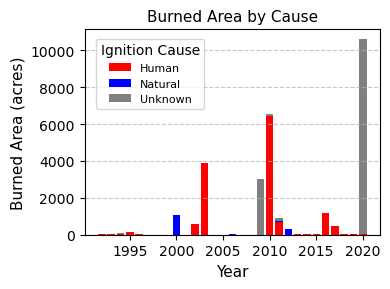

In [112]:
# Aggregate burned area by FIRE_YEAR and NWCG_CAUSE_CLASSIFICATION
burned_area = boco_ig.groupby(['FIRE_YEAR', 'NWCG_CAUSE_CLASSIFICATION'])['FIRE_SIZE'].sum().reset_index()
burned_area = burned_area.pivot(index='FIRE_YEAR', columns='NWCG_CAUSE_CLASSIFICATION', values='FIRE_SIZE').fillna(0)

# Plot the time-series for burned area
fig, ax = plt.subplots(figsize=(4, 3))

# Initialize bottom for stacking
bottom = np.zeros(len(burned_area))

# Iterate through each cause and plot its bar
for cause in burned_area.columns:
    print(cause)
    ax.bar(
        burned_area.index, 
        burned_area[cause], 
        bottom=bottom, 
        label=cause, 
        color=color_mapping.get(cause, 'blue')  # Default to blue if cause not in mapping
    )
    bottom += burned_area[cause].values  # Update the bottom for stacking

# Add labels and legend
ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('Burned Area (acres)', fontsize=11)
ax.legend(
    title='Ignition Cause', 
    loc='upper left', 
    bbox_to_anchor=(0.02, 0.98),  # Offset for positioning inside the plot
    frameon=True,  # Add a background box for better readability
    fontsize=8
)
ax.set_title('Burned Area by Cause', fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the map as a PNG
plt.savefig(os.path.join(projdir, 'figures/BoulderCounty_BurnedArea_FPA-FOD-TimeSeries.png'), dpi=300, bbox_inches='tight')

plt.show()